# The [Universality of the Uniform](https://twitter.com/stat110/status/1055180972575125504) for Generating Random Samples

An Exponential r.v. $X$ with rate parameter $\lambda$ (hence mean $1/\lambda$) has CDF $\Pr[X \leq x] = 1 - \exp(-\lambda x)$. Here, $\Pr[X \leq x] \in [0, 1]$ represents the probability that $X$ crystallizes below or at $x$. [1][1], [2][2]

By the marvelous Universality of the Uniform, this means we can simulate a random draw of $X$ by plugging a Standard Uniform r.v. $U$ into the inverse of the CDF, i.e. $-\ln(1-U)/\lambda$! (That's an exclamation mark, not a factorial sign. This is exciting stuff.) [3][3], [4][4]

[1]: By the way, every Exponential distribution is memoryless i.e. $E[X - t \mid X > t] = E[X]$. If you interpret $X$ as a waiting time, this property says that the amount of _additional_ time you can expect to wait before $X$ hits, given that you've already waited for $t$ minutes and $X$ hasn't hit yet, is exactly the same as the amount of _total_ time you had expected to wait when you originally started waiting. $X$ doesn't "care" that you've already been waiting for $t$ minutes: It's memoryless. Another way to write this is $E[X \mid X > t] = E[X] + t$: The amount of total time you can expect to wait before $X$ hits, given that you've already waited for $t$ minutes, is the same as the amount of total time you had expected to wait originally, plus $t$ minutes. In fact, Exponential distributions are the _only_ memoryless continuous distributions. (In discrete time, every Geometric distribution is memoryless, and in fact Geometric distributions are the _only_ memoryless distributions.)

[2]: Exponential distributions are also the only possible waiting-time distributions for Poisson counting processes. A Poisson counting process with rate parameter $\lambda$ is a continuous-time stochastic process $N(t)$ over $t \geq 0$ characterized by the following four properties: 0. $N(t) = 0$; 1. Independent increments; 2. Stationary increments; 3. $N(t)$ follows a Poisson distribution with rate parameter $\lambda t$. (In discrete time, Geometric distributions are the only possible waiting-time distributions for Binomial counting processes.)

[3]: We could also use the identically-distributed but simpler form $-\ln(U)/\lambda$. However, this would mean that $U = 0$ maps to $X = +\infty$, whereas I prefer $U = 1$ mapping to $X = +\infty$, since according to the CDF, $x = +\infty$ maps to $Pr[X \leq x] = 1$.

[4]: This is actually only one direction of the Universality of the Uniform, in particular the direction that says that for a random variable $X$ with CDF $F$, we have $F^{-1}(U) \cong X$ where $\cong$ means "is identically distributed to". The other direction says that $F(X) \cong U$, an equally interesting but less useful (to us) result. You can use that other direction to prove that $p$-values are standard Uniform under the null hypothesis. To wit: Before you conduct your experiment, and assuming that the null hypothesis $H_0$ is true, you can view the final test statistic as a random variable $S$. The final $p$-value is defined as $p = \Pr[T \geq S \mid S,\, H_0]$, where $T$ i.i.d. $S$. Hence, assuming you have a continuous test statistic, $p = 1 - Pr[T \leq S \mid S,\, H_0]$, whence $p = 1 - F_T(S)$ where $F_T$ is the CDF of $T$ under the null hypothesis. But since $T$ i.i.d. $S$, we can write $p = 1 - F_S(S)$ which we now know is identically distributed to $1 - U$. Then we need only remember that for a standard Uniform $U$, $1 - U \cong U$, and we have QED.

In [1]:
from typing import List
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_expon_rv(unif_rv: float, lambda_: float=1) -> float:
    return -np.log(1 - unif_rv) / lambda_


def sim_expon_rvs(lambda_: float=1, n: int=1_000) -> List[float]:
    return [get_expon_rv(unif_rv=u, lambda_=lambda_) for u in np.random.random(size=n)]


def plot_sim(ax: object, lambda_: float=1) -> object:
    expected_mean = 1 / lambda_
    
    x = sim_expon_rvs(lambda_=lambda_)
    obs_mean = np.mean(x)
    
    ax.hist(x)
    ax.set_title(r"$\lambda = {lambda_} \rightarrow E[X] = {e: .2f}$.. Observed Mean = {obs: .2f}".format(
        lambda_=lambda_, e=expected_mean, obs=obs_mean))
    return ax


def plot_sims(lambdas: List[float]):
    _, axs = plt.subplots(nrows=len(lambdas), ncols=1, sharex=True, sharey=True, figsize=(16, 16))
    for i, lambda_ in enumerate(lambdas):
        plot_sim(ax=axs[i], lambda_=lambda_)
    plt.suptitle("Simulated Expon PDF's (w/ Theoretical & Obs Means)")
    plt.show()

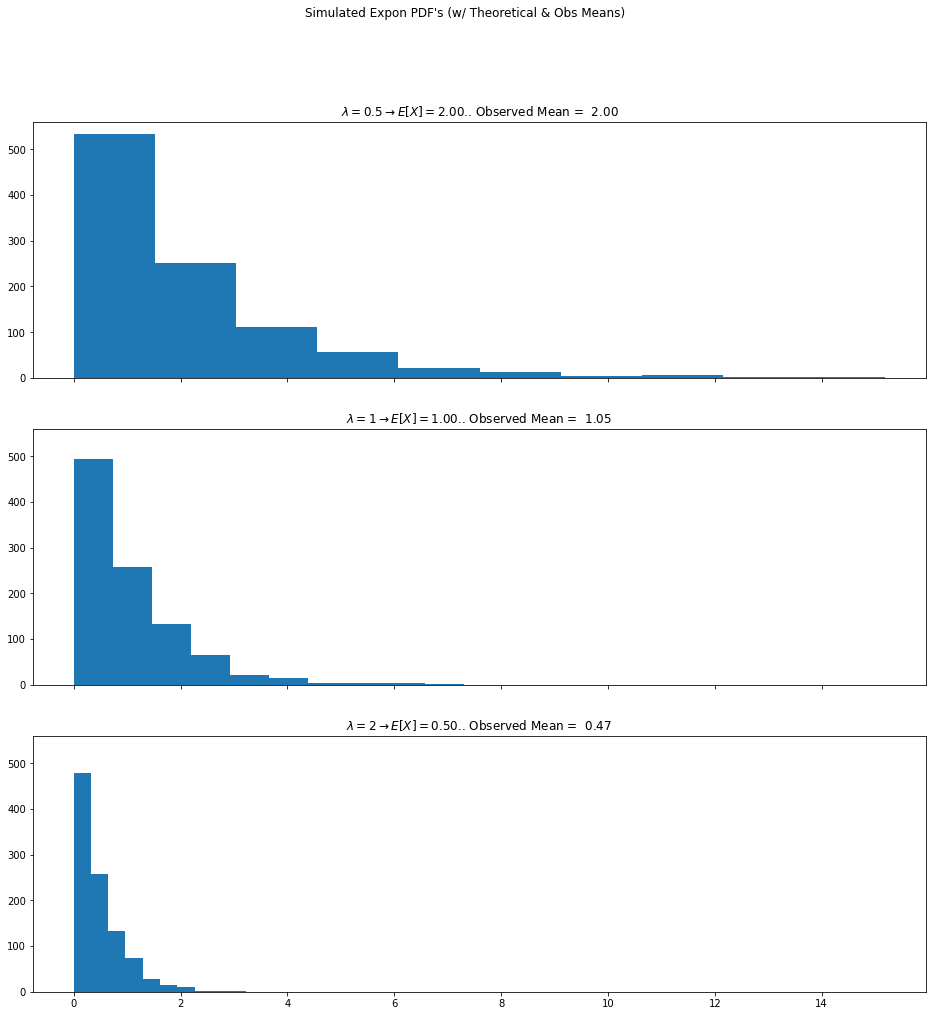

In [3]:
np.random.seed(1337)
plot_sims(lambdas=[0.5, 1, 2])